In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
airplane = pd.read_csv('downloads/airplane.csv')
airplane.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [62]:
airplane.isnull().sum()

Date            0
Location        0
Operator        0
Route           0
Type            0
Registration    0
cn/In           0
Aboard          0
Fatalities      0
Ground          0
Summary         0
dtype: int64

In [41]:
airplane = airplane.drop('Flight #',axis=1)

In [58]:
airplane = airplane.drop('Time',axis=1)

In [43]:
airplane['Type'] = airplane['Type'].fillna(airplane['Type'].mode()) 

In [46]:
from sklearn.impute import SimpleImputer
se = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
se.fit(airplane[['Type']])

SimpleImputer(strategy='most_frequent')

In [47]:
airplane[['Type']] = se.transform(airplane[['Type']])

In [49]:
se.fit(airplane[['Registration']])
airplane[['Registration']] = se.transform(airplane[['Registration']])

In [51]:
se.fit(airplane[['Route']])
airplane[['Route']] = se.transform(airplane[['Route']])

In [53]:
se.fit(airplane[['cn/In']])
airplane[['cn/In']] = se.transform(airplane[['cn/In']])

In [54]:
se.fit(airplane[['Aboard']])
airplane[['Aboard']] = se.transform(airplane[['Aboard']])

In [55]:
se.fit(airplane[['Fatalities']])
airplane[['Fatalities']] = se.transform(airplane[['Fatalities']])

In [56]:
se.fit(airplane[['Ground']])
airplane[['Ground']] = se.transform(airplane[['Ground']])

In [59]:
se.fit(airplane[['Location']])
airplane[['Location']] = se.transform(airplane[['Location']])

In [60]:
se.fit(airplane[['Operator']])
airplane[['Operator']] = se.transform(airplane[['Operator']])

In [61]:
se.fit(airplane[['Summary']])
airplane[['Summary']] = se.transform(airplane[['Summary']])

In [3]:
data = pd.read_csv('downloads/online_education.csv')
data.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


In [4]:
data.isnull().sum()

Gender                                                           0
Home Location                                                    0
Level of Education                                               0
Age(Years)                                                       0
Number of Subjects                                               0
Device type used to attend classes                               0
Economic status                                                  0
Family size                                                      0
Internet facility in your locality                               0
Are you involved in any sports?                                  0
Do elderly people monitor you?                                   0
Study time (Hours)                                               0
Sleep time (Hours)                                               0
Time spent on social media (Hours)                               0
Interested in Gaming?                                         

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

<AxesSubplot:>

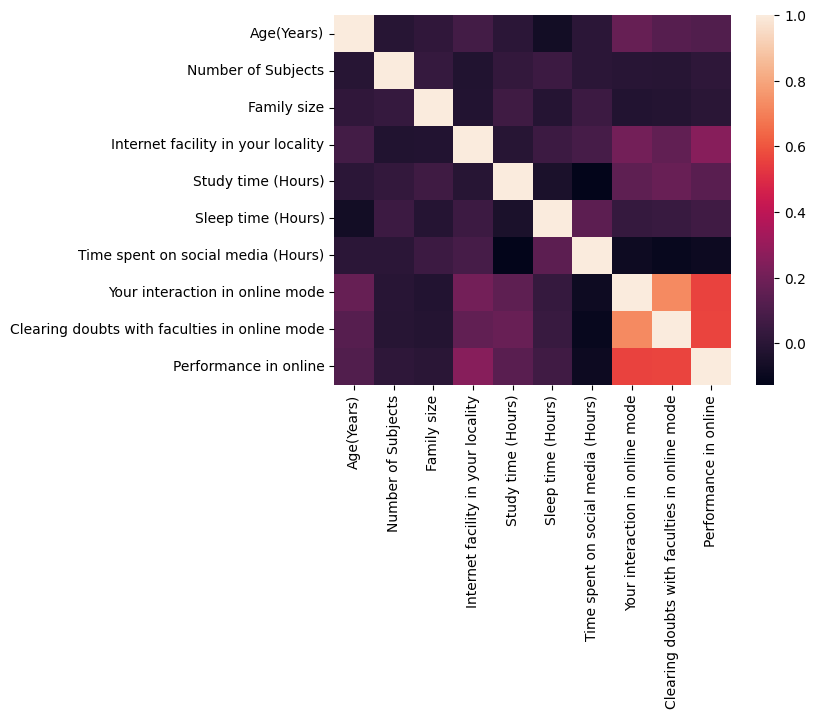

In [8]:
sns.heatmap(data.corr())

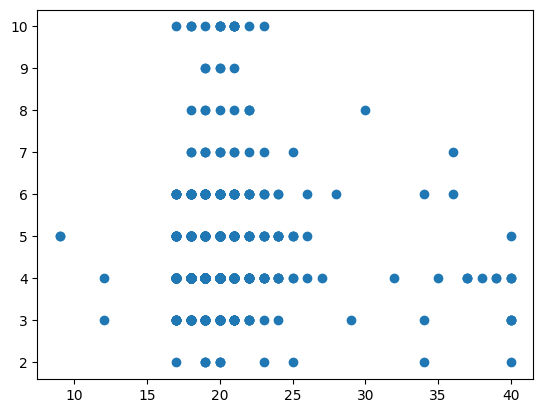

In [12]:
plt.scatter(data['Age(Years)'],data['Family size'])

(array([  4.,   0., 319., 602.,  72.,  11.,   3.,   1.,   6.,  15.]),
 array([ 9. , 12.1, 15.2, 18.3, 21.4, 24.5, 27.6, 30.7, 33.8, 36.9, 40. ]),
 <BarContainer object of 10 artists>)

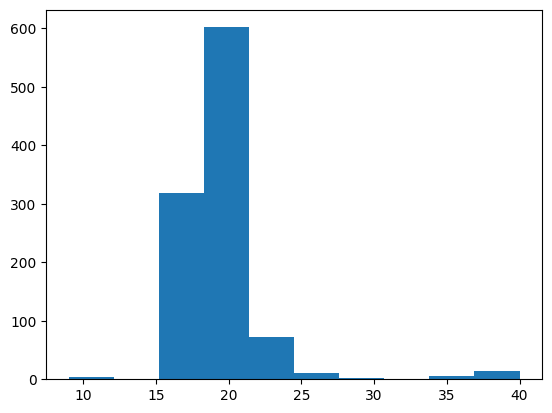

In [15]:
plt.hist(data['Age(Years)'])

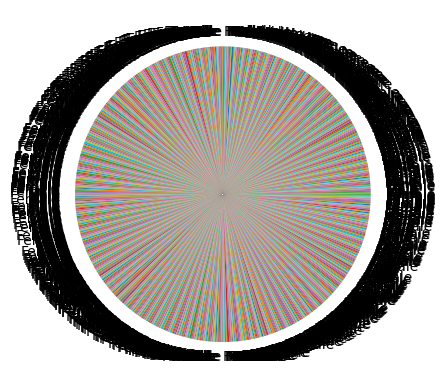

In [22]:
plt.pie(data['Family size'], labels=data['Gender'])
plt.show()

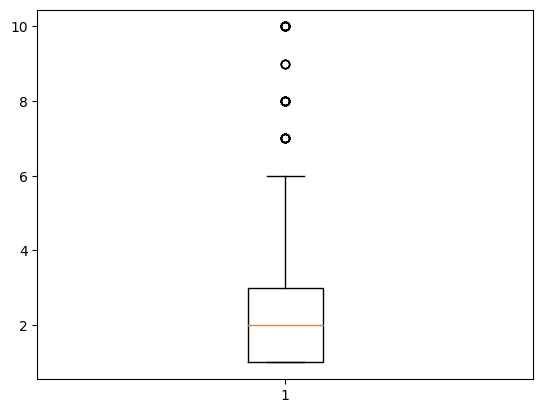

In [24]:
plt.boxplot(data['Time spent on social media (Hours)'])
plt.show()

<BarContainer object of 1033 artists>

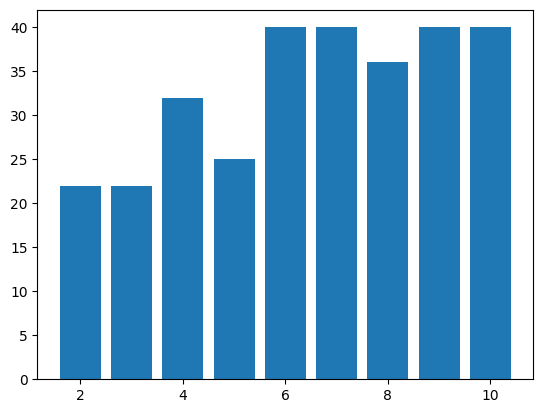

In [29]:
plt.bar(data['Performance in online'],height=data['Age(Years)'])